# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import cv2
from skimage.transform import resize  

Using TensorFlow backend.


In [2]:
train_file=pd.read_csv('/Users/hemilshah/Downloads/mnistdigit/train.csv')

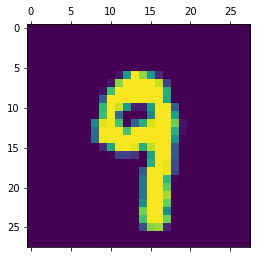

In [3]:
def convert_format(path):
  image = cv2.imread(path,0)
  image=image/255.0
  resized = resize(image, (28,28))
  return resized
plt.matshow(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/train/1.png'))
plt.show()

In [4]:
train_file=pd.read_csv('/Users/hemilshah/Downloads/mnistdigit/train.csv')
listing=[]
for i in range(0,len(train_file)):
    listing.append(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/train/'+str(i)+'.png'))
X=np.array(listing)
X=X.reshape((-1,28,28,1))
y=train_file['label'].values
y=tf.keras.utils.to_categorical(y)
print(X.shape,y.shape)

(49000, 28, 28, 1) (49000, 10)


In [ ]:
test_file=pd.read_csv('/Users/hemilshah/Downloads/mnistdigit/sample_submission.csv')
k=test_file['filename'].values
test_listing=[]
for i in k:
    test_listing.append(convert_format('/Users/hemilshah/Downloads/mnistdigit/Images/test/'+str(i)))
test=np.array(test_listing)
test=test.reshape((-1,28,28,1))
print(test.shape)

# CNN Model Building

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=X.shape[1:], activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizer)

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [8]:
model.fit(X,y,epochs=10)

Train on 49000 samples
Epoch 1/10
49000/49000 [==============================] - 20s 401us/sample - loss: 0.2076 - accuracy: 0.9358
Epoch 2/10
49000/49000 [==============================] - 20s 400us/sample - loss: 0.0737 - accuracy: 0.9765
Epoch 3/10
49000/49000 [==============================] - 21s 431us/sample - loss: 0.0560 - accuracy: 0.9818
Epoch 4/10
49000/49000 [==============================] - 21s 432us/sample - loss: 0.0455 - accuracy: 0.9854
Epoch 5/10
49000/49000 [==============================] - 21s 437us/sample - loss: 0.0393 - accuracy: 0.9869
Epoch 6/10
49000/49000 [==============================] - 22s 441us/sample - loss: 0.0338 - accuracy: 0.9892
Epoch 7/10
49000/49000 [==============================] - 22s 444us/sample - loss: 0.0304 - accuracy: 0.9900
Epoch 8/10
49000/49000 [==============================] - 22s 443us/sample - loss: 0.0263 - accuracy: 0.9913
Epoch 9/10
49000/49000 [==============================] - 22s 448us/sample - loss: 0.0259 - accuracy: 0.9

In [9]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit_generator(training_generator,
                            steps_per_epoch=44100//256,
                            epochs=10,
                            validation_steps=4900//256,
                            validation_data=validation_generator,
                            callbacks=[early_stop])

W0615 11:19:46.474992 4400045504 deprecation.py:323] From <ipython-input-9-02fae56c4ee6>:7: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0615 11:19:46.542815 4400045504 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0615 11:19:46.612762 4400045504 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 172 steps, validate for 19 steps
Epoch 1/10
172/172 [==============================] - 93s 542ms/step - loss: 0.3957 - accuracy: 0.8799 - val_loss: 7.7846 - val_accuracy: 0.1088
Epoch 2/10
172/172 [==============================] - 98s 572ms/step - loss: 0.1112 - accuracy: 0.9665 - val_loss: 3.6340 - val_accuracy: 0.2461
Epoch 3/10
172/172 [==============================] - 100s 583ms/step - loss: 0.0775 - accuracy: 0.9759 - val_loss: 0.1774 - val_accuracy: 0.9431
Epoch 4/10
172/172 [==============================] - 98s 568ms/step - loss: 0.0635 - accuracy: 0.9812 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 5/10
172/172 [==============================] - 96s 559ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 6/10
172/172 [==============================] - 105s 608ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.0326 - val_accuracy: 0.9883
Epoch 7/10
172/172 [==============================] - 104s 604ms/step - loss: 0.0415 

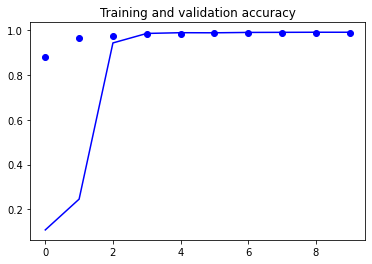

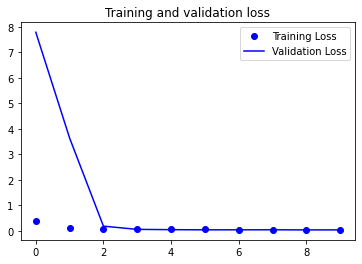

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.evaluate(X_test,y_test)

4900/4900 [==============================] - 2s 481us/sample - loss: 0.0272 - accuracy: 0.9922


[0.02720301625229138, 0.9922449]

In [9]:
model.save('mnist_sudokumodel.h5')